# Classification with different Machine learning algorithms (Traditional)

# importing libraries

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
import pandas as pd

from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.metrics import classification_report
from skimage.feature import greycomatrix, greycoprops

from sklearn.model_selection import StratifiedKFold

In [2]:
dire="D:/Individual_Trees_photos/exatctcrop"
categories= ['European beech', 'European silver fir', 'Norway spruce', 'Sessile oak']

data =[]
SIZE = 200
images =[]
label1 =[]
for category in categories:
    path = os.path.join(dire, category)
    label = categories.index(category)
    
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        tree_img = cv2.imread(imgpath,0)
        try:
            tree_img = cv2.resize(tree_img, (SIZE, SIZE)) #Resize images
            #tree_img = cv2.resize(tree_img,(50,50))
            image = np.array(tree_img).flatten()
        
            #data.append([image, label])
            images.append(tree_img)
            label1.append(label)
        except Exception as e:
            pass
images=np.array(images)   

In [3]:
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
        
        #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr
        
        GLCM2 = greycomatrix(img, [3], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
        
        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        #Add more filters as needed
        #entropy = shannon_entropy(img)
        #df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [4]:
#Extract features from images
image_features = feature_extractor(images)
X_for_ML =image_features


# Train and test data split 

In [5]:
#train test

xtrain, xtest, ytrain, ytest = train_test_split(X_for_ML, label1, test_size =0.25)

# Machine learning Algorithms

## Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 40)
classifier.fit(xtrain, ytrain)


RandomForestClassifier(n_estimators=40)

In [7]:
from sklearn.metrics import classification_report
predictions = classifier.predict(xtest)
print (classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.88      0.81      0.85        27
           2       0.82      0.85      0.84        33
           3       0.91      0.91      0.91        43

    accuracy                           0.89       132
   macro avg       0.89      0.89      0.89       132
weighted avg       0.89      0.89      0.89       132



<AxesSubplot:>

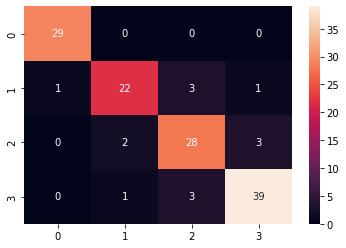

In [8]:
matrix= confusion_matrix(ytest, predictions)

sns.heatmap(matrix,annot = True, fmt = "d")

In [9]:
# Train model multiple times to find the highest accuracy
best = 0
for _ in range(200):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    classifier = RandomForestClassifier(n_estimators = 40)
    classifier.fit(xtrain, ytrain)

    
    acc = classifier.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
       
print("Highest Accuracy:", best)

Accuracy: 0.803030303030303
Accuracy: 0.8787878787878788
Accuracy: 0.8257575757575758
Accuracy: 0.8257575757575758
Accuracy: 0.8484848484848485
Accuracy: 0.7878787878787878
Accuracy: 0.8863636363636364
Accuracy: 0.8636363636363636
Accuracy: 0.8484848484848485
Accuracy: 0.9090909090909091
Accuracy: 0.8712121212121212
Accuracy: 0.8181818181818182
Accuracy: 0.8484848484848485
Accuracy: 0.8712121212121212
Accuracy: 0.8712121212121212
Accuracy: 0.8636363636363636
Accuracy: 0.8787878787878788
Accuracy: 0.8181818181818182
Accuracy: 0.9015151515151515
Accuracy: 0.8787878787878788
Accuracy: 0.7954545454545454
Accuracy: 0.8787878787878788
Accuracy: 0.8636363636363636
Accuracy: 0.8712121212121212
Accuracy: 0.9166666666666666
Accuracy: 0.8560606060606061
Accuracy: 0.8712121212121212
Accuracy: 0.8409090909090909
Accuracy: 0.8712121212121212
Accuracy: 0.8636363636363636
Accuracy: 0.8560606060606061
Accuracy: 0.8863636363636364
Accuracy: 0.8863636363636364
Accuracy: 0.9015151515151515
Accuracy: 0.818

## K-Neighbors 

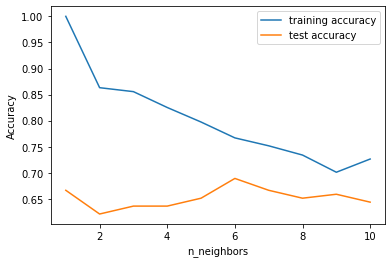

In [10]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(knn.score(xtrain, ytrain))
    # record test set accuracy
    test_accuracy.append(knn.score(xtest, ytest))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [11]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain, ytrain)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(xtrain, ytrain)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(xtest, ytest)))

Accuracy of K-NN classifier on training set: 0.75
Accuracy of K-NN classifier on test set: 0.67


In [12]:
predictions1 = knn.predict(xtest)
print (classification_report(ytest, predictions1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       0.44      0.32      0.37        25
           2       0.61      0.65      0.62        31
           3       0.58      0.62      0.60        42

    accuracy                           0.67       132
   macro avg       0.64      0.65      0.64       132
weighted avg       0.65      0.67      0.66       132



In [13]:
# Train model multiple times to find the highest accuracy
best = 0
for _ in range(200):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(xtrain, ytrain)

    
    acc = knn.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(knn, f)
print("Highest Accuracy:", best)

Accuracy: 0.6515151515151515
Accuracy: 0.6742424242424242
Accuracy: 0.6742424242424242
Accuracy: 0.6439393939393939
Accuracy: 0.6742424242424242
Accuracy: 0.6287878787878788
Accuracy: 0.6590909090909091
Accuracy: 0.6818181818181818
Accuracy: 0.6893939393939394
Accuracy: 0.6439393939393939
Accuracy: 0.7424242424242424
Accuracy: 0.6439393939393939
Accuracy: 0.5833333333333334
Accuracy: 0.6515151515151515
Accuracy: 0.7045454545454546
Accuracy: 0.696969696969697
Accuracy: 0.6818181818181818
Accuracy: 0.696969696969697
Accuracy: 0.696969696969697
Accuracy: 0.6439393939393939
Accuracy: 0.6515151515151515
Accuracy: 0.6060606060606061
Accuracy: 0.6742424242424242
Accuracy: 0.6363636363636364
Accuracy: 0.6590909090909091
Accuracy: 0.7424242424242424
Accuracy: 0.6363636363636364
Accuracy: 0.696969696969697
Accuracy: 0.6893939393939394
Accuracy: 0.7045454545454546
Accuracy: 0.6818181818181818
Accuracy: 0.6136363636363636
Accuracy: 0.6893939393939394
Accuracy: 0.6136363636363636
Accuracy: 0.621212

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(tree.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.841


In [15]:
tree = DecisionTreeClassifier(max_depth=4, random_state=1)
tree.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(tree.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(xtest, ytest)))


Accuracy on training set: 0.828
Accuracy on test set: 0.795


In [16]:
best = 0
for _ in range(200):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    tree = DecisionTreeClassifier(max_depth=4, random_state=1)
    tree.fit(xtrain, ytrain)


    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(tree, f)
print("Highest Accuracy:", best)

Accuracy: 0.803030303030303
Accuracy: 0.803030303030303
Accuracy: 0.7651515151515151
Accuracy: 0.7575757575757576
Accuracy: 0.7424242424242424
Accuracy: 0.7196969696969697
Accuracy: 0.7348484848484849
Accuracy: 0.6742424242424242
Accuracy: 0.696969696969697
Accuracy: 0.7348484848484849
Accuracy: 0.75
Accuracy: 0.7196969696969697
Accuracy: 0.7803030303030303
Accuracy: 0.7727272727272727
Accuracy: 0.8181818181818182
Accuracy: 0.7045454545454546
Accuracy: 0.6439393939393939
Accuracy: 0.7348484848484849
Accuracy: 0.75
Accuracy: 0.7727272727272727
Accuracy: 0.7424242424242424
Accuracy: 0.7954545454545454
Accuracy: 0.7575757575757576
Accuracy: 0.75
Accuracy: 0.7727272727272727
Accuracy: 0.7348484848484849
Accuracy: 0.7424242424242424
Accuracy: 0.7803030303030303
Accuracy: 0.8257575757575758
Accuracy: 0.7272727272727273
Accuracy: 0.7575757575757576
Accuracy: 0.7727272727272727
Accuracy: 0.6666666666666666
Accuracy: 0.8181818181818182
Accuracy: 0.7651515151515151
Accuracy: 0.7121212121212122
A

# RandomForest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(rf.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.856


In [18]:
rf1 = RandomForestClassifier(max_depth=9, n_estimators=100, random_state=1)
rf1.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(rf1.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf1.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.856


In [19]:
best = 0
for _ in range(200):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    rf1 = RandomForestClassifier(max_depth=9, n_estimators=100, random_state=1)
    rf1.fit(xtrain, ytrain)


    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(rf1, f)
print("Highest Accuracy:", best)

Accuracy: 0.8106060606060606
Accuracy: 0.7651515151515151
Accuracy: 0.8712121212121212
Accuracy: 0.7803030303030303
Accuracy: 0.8181818181818182
Accuracy: 0.8636363636363636
Accuracy: 0.8257575757575758
Accuracy: 0.8257575757575758
Accuracy: 0.7954545454545454
Accuracy: 0.8181818181818182
Accuracy: 0.8333333333333334
Accuracy: 0.8333333333333334
Accuracy: 0.8181818181818182
Accuracy: 0.8409090909090909
Accuracy: 0.8409090909090909
Accuracy: 0.8106060606060606
Accuracy: 0.7878787878787878
Accuracy: 0.803030303030303
Accuracy: 0.8787878787878788
Accuracy: 0.8257575757575758
Accuracy: 0.803030303030303
Accuracy: 0.7878787878787878
Accuracy: 0.7727272727272727
Accuracy: 0.7727272727272727
Accuracy: 0.8560606060606061
Accuracy: 0.7803030303030303
Accuracy: 0.7727272727272727
Accuracy: 0.7878787878787878
Accuracy: 0.8181818181818182
Accuracy: 0.8106060606060606
Accuracy: 0.7803030303030303
Accuracy: 0.7954545454545454
Accuracy: 0.8257575757575758
Accuracy: 0.7878787878787878
Accuracy: 0.8106

# Gradient Boost

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(gb.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gb.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.894


In [21]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=2)
gb1.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(gb1.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gb1.score(xtest, ytest)))


Accuracy on training set: 1.000
Accuracy on test set: 0.886


In [22]:
best = 0
for _ in range(200):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    gb1 = GradientBoostingClassifier(random_state=0, max_depth=2)
    gb1.fit(xtrain, ytrain)



    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(gb1, f)
print("Highest Accuracy:", best)

Accuracy: 0.7727272727272727
Accuracy: 0.8560606060606061
Accuracy: 0.8181818181818182
Accuracy: 0.8484848484848485
Accuracy: 0.8181818181818182
Accuracy: 0.8257575757575758
Accuracy: 0.7575757575757576
Accuracy: 0.7954545454545454
Accuracy: 0.7954545454545454
Accuracy: 0.8484848484848485
Accuracy: 0.803030303030303
Accuracy: 0.7954545454545454
Accuracy: 0.8484848484848485
Accuracy: 0.8257575757575758
Accuracy: 0.8181818181818182
Accuracy: 0.8181818181818182
Accuracy: 0.8181818181818182
Accuracy: 0.8712121212121212
Accuracy: 0.8333333333333334
Accuracy: 0.8409090909090909
Accuracy: 0.8181818181818182
Accuracy: 0.8333333333333334
Accuracy: 0.803030303030303
Accuracy: 0.8333333333333334
Accuracy: 0.8409090909090909
Accuracy: 0.8257575757575758
Accuracy: 0.7878787878787878
Accuracy: 0.7954545454545454
Accuracy: 0.8560606060606061
Accuracy: 0.7651515151515151
Accuracy: 0.8333333333333334
Accuracy: 0.8257575757575758
Accuracy: 0.8560606060606061
Accuracy: 0.8560606060606061
Accuracy: 0.8106

# Support Vector Machine

In [23]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xtrain, ytrain)

print("Accuracy on training set: {:.2f}".format(svc.score(xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(svc.score(xtest, ytest)))

Accuracy on training set: 0.65
Accuracy on test set: 0.64


In [24]:
best = 0
for _ in range(200):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    svc = SVC()
    svc.fit(xtrain, ytrain)


    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(svc, f)
print("Highest Accuracy:", best)

Accuracy: 0.8181818181818182
Accuracy: 0.8181818181818182
Accuracy: 0.8106060606060606
Accuracy: 0.8560606060606061
Accuracy: 0.8484848484848485
Accuracy: 0.8636363636363636
Accuracy: 0.8181818181818182
Accuracy: 0.7651515151515151
Accuracy: 0.7803030303030303
Accuracy: 0.8409090909090909
Accuracy: 0.8106060606060606
Accuracy: 0.803030303030303
Accuracy: 0.7651515151515151
Accuracy: 0.8257575757575758
Accuracy: 0.8712121212121212
Accuracy: 0.8484848484848485
Accuracy: 0.7954545454545454
Accuracy: 0.8181818181818182
Accuracy: 0.8106060606060606
Accuracy: 0.8636363636363636
Accuracy: 0.8257575757575758
Accuracy: 0.7954545454545454
Accuracy: 0.8333333333333334
Accuracy: 0.8106060606060606
Accuracy: 0.8409090909090909
Accuracy: 0.7727272727272727
Accuracy: 0.8181818181818182
Accuracy: 0.7954545454545454
Accuracy: 0.8333333333333334
Accuracy: 0.8333333333333334
Accuracy: 0.8257575757575758
Accuracy: 0.75
Accuracy: 0.8333333333333334
Accuracy: 0.8106060606060606
Accuracy: 0.8409090909090909


# Gaussian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain, ytrain)

y_pred_nb = model.predict(xtest)
print(y_pred_nb)

[3 0 1 1 0 2 2 0 2 1 1 2 1 1 1 1 0 1 3 2 1 1 2 1 0 3 3 1 1 1 3 0 0 0 2 3 3
 0 2 0 0 0 0 2 0 2 2 0 1 0 0 0 0 2 0 1 3 0 2 3 2 0 1 2 0 0 3 1 0 2 3 2 2 2
 2 1 2 0 1 3 0 0 0 0 0 2 0 1 2 0 2 3 0 3 0 1 1 3 3 1 0 0 1 2 2 1 3 3 2 0 2
 0 1 2 0 3 2 0 3 1 2 1 0 0 2 0 0 0 2 1 2 1]


In [26]:
score_nb = round(accuracy_score(y_pred_nb,ytest)*100,2)

print("The accuracy score using Naive Bayes is: "+str(score_nb)+" %")


The accuracy score using Naive Bayes is: 71.97 %


In [27]:
best = 0
for _ in range(200):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    model=GaussianNB()
    model.fit(xtrain, ytrain)


    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(model, f)
print("Highest Accuracy:", best)

Accuracy: 0.8409090909090909
Accuracy: 0.8106060606060606
Accuracy: 0.7878787878787878
Accuracy: 0.7878787878787878
Accuracy: 0.7878787878787878
Accuracy: 0.7878787878787878
Accuracy: 0.803030303030303
Accuracy: 0.803030303030303
Accuracy: 0.7954545454545454
Accuracy: 0.7954545454545454
Accuracy: 0.8409090909090909
Accuracy: 0.7878787878787878
Accuracy: 0.8257575757575758
Accuracy: 0.8257575757575758
Accuracy: 0.8333333333333334
Accuracy: 0.803030303030303
Accuracy: 0.7727272727272727
Accuracy: 0.803030303030303
Accuracy: 0.803030303030303
Accuracy: 0.8106060606060606
Accuracy: 0.7878787878787878
Accuracy: 0.8484848484848485
Accuracy: 0.7803030303030303
Accuracy: 0.8181818181818182
Accuracy: 0.7954545454545454
Accuracy: 0.803030303030303
Accuracy: 0.8257575757575758
Accuracy: 0.7803030303030303
Accuracy: 0.8484848484848485
Accuracy: 0.7878787878787878
Accuracy: 0.8181818181818182
Accuracy: 0.8257575757575758
Accuracy: 0.8409090909090909
Accuracy: 0.7878787878787878
Accuracy: 0.82575757

<AxesSubplot:>

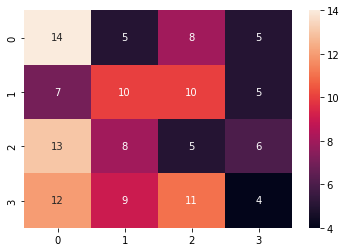

In [28]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(ytest, y_pred_nb)

sns.heatmap(matrix,annot = True, fmt = "d")

# Neural Networks

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(xtrain, ytrain)

print("Accuracy on training set: {:.2f}".format(mlp.score(xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(mlp.score(xtest, ytest)))

Accuracy on training set: 0.70
Accuracy on test set: 0.58


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.fit_transform(xtest)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, ytrain)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.937
Accuracy on test set: 0.856


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, ytrain)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.967
Accuracy on test set: 0.909


In [32]:
best = 0
for _ in range(200):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
    mlp.fit(X_train_scaled, ytrain)



    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(mlp, f)
print("Highest Accuracy:", best)

Accuracy: 0.8106060606060606
Accuracy: 0.8333333333333334
Accuracy: 0.7954545454545454
Accuracy: 0.75
Accuracy: 0.7803030303030303
Accuracy: 0.8484848484848485
Accuracy: 0.8106060606060606
Accuracy: 0.7954545454545454


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7954545454545454
Accuracy: 0.8409090909090909
Accuracy: 0.8257575757575758
Accuracy: 0.8181818181818182
Accuracy: 0.8409090909090909
Accuracy: 0.8409090909090909
Accuracy: 0.8409090909090909
Accuracy: 0.7651515151515151


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7878787878787878
Accuracy: 0.75


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.803030303030303
Accuracy: 0.803030303030303
Accuracy: 0.8257575757575758


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8636363636363636


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7803030303030303
Accuracy: 0.8863636363636364


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8484848484848485


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8106060606060606
Accuracy: 0.8181818181818182
Accuracy: 0.8333333333333334
Accuracy: 0.7954545454545454


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8106060606060606
Accuracy: 0.7878787878787878
Accuracy: 0.8106060606060606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.803030303030303
Accuracy: 0.7954545454545454
Accuracy: 0.803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8181818181818182
Accuracy: 0.803030303030303
Accuracy: 0.8712121212121212


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.803030303030303
Accuracy: 0.8636363636363636


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8409090909090909
Accuracy: 0.7878787878787878
Accuracy: 0.7878787878787878


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7878787878787878


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8106060606060606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8106060606060606
Accuracy: 0.8636363636363636
Accuracy: 0.7954545454545454


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8257575757575758
Accuracy: 0.75
Accuracy: 0.8106060606060606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8181818181818182


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8257575757575758


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7878787878787878


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8106060606060606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7575757575757576
Accuracy: 0.8409090909090909
Accuracy: 0.8409090909090909
Accuracy: 0.8484848484848485
Accuracy: 0.8106060606060606
Accuracy: 0.8257575757575758
Accuracy: 0.803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7575757575757576


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8181818181818182
Accuracy: 0.7575757575757576


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8712121212121212


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8333333333333334
Accuracy: 0.8712121212121212
Accuracy: 0.8636363636363636
Accuracy: 0.7954545454545454
Accuracy: 0.803030303030303
Accuracy: 0.7878787878787878
Accuracy: 0.8409090909090909
Accuracy: 0.7954545454545454


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8560606060606061


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7727272727272727
Accuracy: 0.7348484848484849


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8636363636363636


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8106060606060606
Accuracy: 0.8560606060606061
Accuracy: 0.8106060606060606
Accuracy: 0.8181818181818182
Accuracy: 0.8409090909090909
Accuracy: 0.7651515151515151


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8181818181818182
Accuracy: 0.8106060606060606
Accuracy: 0.8484848484848485
Accuracy: 0.803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8106060606060606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7803030303030303
Accuracy: 0.7954545454545454
Accuracy: 0.8257575757575758
Accuracy: 0.7651515151515151


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7727272727272727
Accuracy: 0.8106060606060606
Accuracy: 0.8181818181818182
Accuracy: 0.8560606060606061
Accuracy: 0.803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8636363636363636
Accuracy: 0.7727272727272727
Accuracy: 0.7575757575757576
Accuracy: 0.7803030303030303
Accuracy: 0.8106060606060606
Accuracy: 0.8257575757575758
Accuracy: 0.803030303030303
Accuracy: 0.8333333333333334
Accuracy: 0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7878787878787878


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7954545454545454


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8181818181818182


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8560606060606061
Accuracy: 0.8181818181818182


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7727272727272727


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8333333333333334
Accuracy: 0.7954545454545454


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8257575757575758


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8181818181818182
Accuracy: 0.8106060606060606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8106060606060606
Accuracy: 0.8106060606060606
Accuracy: 0.8181818181818182
Accuracy: 0.803030303030303
Accuracy: 0.803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8181818181818182
Accuracy: 0.8257575757575758


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8257575757575758
Accuracy: 0.7878787878787878
Accuracy: 0.8712121212121212


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8106060606060606
Accuracy: 0.7575757575757576
Accuracy: 0.8409090909090909
Accuracy: 0.8106060606060606
Accuracy: 0.8181818181818182
Accuracy: 0.8484848484848485


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8181818181818182
Accuracy: 0.7954545454545454
Accuracy: 0.8181818181818182


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8106060606060606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8106060606060606
Accuracy: 0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8181818181818182


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7954545454545454
Accuracy: 0.7878787878787878
Accuracy: 0.8181818181818182
Accuracy: 0.8484848484848485
Accuracy: 0.7954545454545454
Accuracy: 0.803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8560606060606061
Accuracy: 0.8333333333333334
Accuracy: 0.8181818181818182


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8106060606060606
Accuracy: 0.8106060606060606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.803030303030303
Accuracy: 0.8257575757575758
Accuracy: 0.7878787878787878
Accuracy: 0.7954545454545454
Accuracy: 0.8106060606060606
Accuracy: 0.8181818181818182
Accuracy: 0.7727272727272727


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8333333333333334
Accuracy: 0.8257575757575758
Accuracy: 0.8409090909090909
Accuracy: 0.7803030303030303
Accuracy: 0.8560606060606061


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8484848484848485
Accuracy: 0.8257575757575758
Accuracy: 0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.803030303030303
Accuracy: 0.8712121212121212
Accuracy: 0.7954545454545454
Accuracy: 0.8106060606060606
Accuracy: 0.8409090909090909


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7803030303030303
Accuracy: 0.8257575757575758
Accuracy: 0.8181818181818182
Accuracy: 0.8484848484848485


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.803030303030303
Accuracy: 0.8181818181818182
Accuracy: 0.8409090909090909
Accuracy: 0.7651515151515151


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8181818181818182


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7878787878787878


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8560606060606061
Accuracy: 0.8636363636363636


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.803030303030303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8257575757575758


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8257575757575758
Accuracy: 0.8181818181818182
Accuracy: 0.8257575757575758
Highest Accuracy: 0.8863636363636364
